# Spanish Translation A/B Test
## challenge Description
Company XYZ is a worldwide e-commerce site with localized versions of the site.<br>
A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.
Spain and LatAm country manager suggested that one reason could be translation. All Spanish-speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain. After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!<br>
You are asked to: 
<br> 
(1) Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better.<br>
(2) Explain why that might be happening. Are the localized translations really worse? <br>
(3) If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.<br>

In [1]:
import pandas as pd

In [2]:
test_table = pd.read_csv('test_table.csv')

In [3]:
user_table = pd.read_csv('user_table.csv')

In [4]:
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [5]:
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [6]:
table = pd.merge(left=test_table,right=user_table,on='user_id')
table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [56]:
table[table['country']!='Spain'].groupby('test')['conversion'].mean()

test
0    0.048292
1    0.043411
Name: conversion, dtype: float64

In [61]:
import scipy.stats as ss
a = table[(table['country']!='Spain') & (table['test']==0)]['conversion']
b = table[(table['country']!='Spain') & (table['test']==1)]['conversion']
ss.ttest_ind(a,b)

Ttest_indResult(statistic=7.382252163053968, pvalue=1.559329277881674e-13)

### answer question 1: <br>
users in test group have a lower conversion rate that in control group

<AxesSubplot:xlabel='source'>

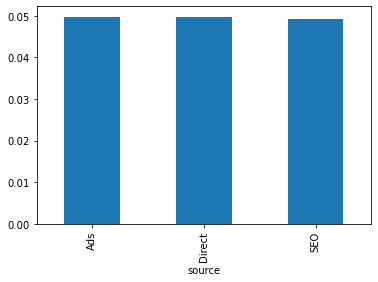

In [11]:
table.groupby('source')['conversion'].mean().plot(kind='bar')

<AxesSubplot:xlabel='source'>

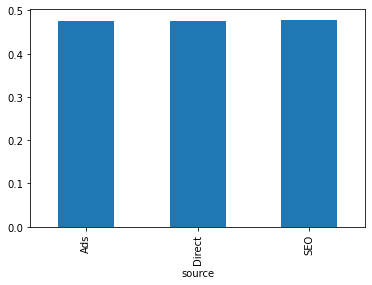

In [21]:
table.groupby('source')['test'].mean().plot(kind='bar')

<AxesSubplot:xlabel='device'>

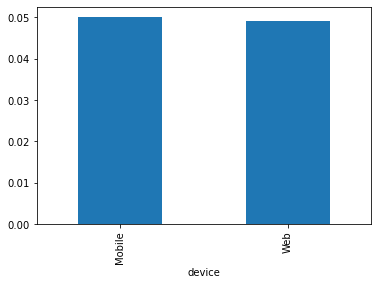

In [12]:
table.groupby('device')['conversion'].mean().plot(kind='bar')

<AxesSubplot:xlabel='device'>

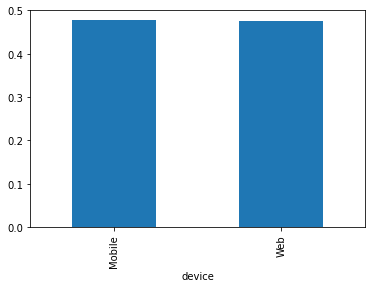

In [22]:
table.groupby('device')['test'].mean().plot(kind='bar')

<AxesSubplot:xlabel='browser_language'>

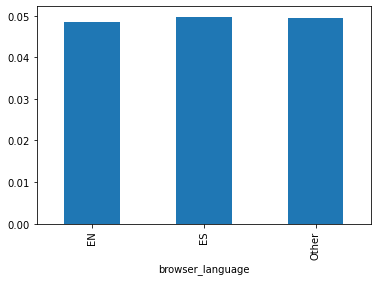

In [13]:
table.groupby('browser_language')['conversion'].mean().plot(kind='bar')

<AxesSubplot:xlabel='browser_language'>

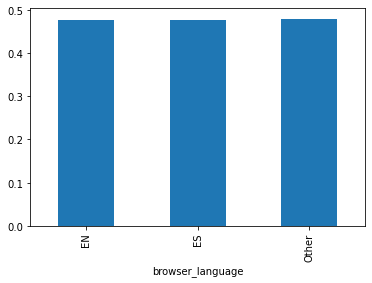

In [23]:
table.groupby('browser_language')['test'].mean().plot(kind='bar')

<AxesSubplot:xlabel='ads_channel'>

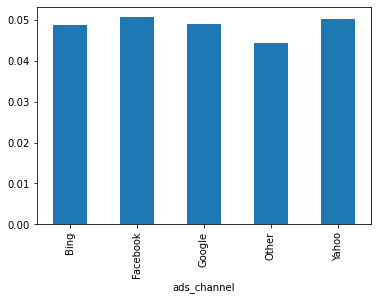

In [14]:
table.groupby('ads_channel')['conversion'].mean().plot(kind='bar')

<AxesSubplot:xlabel='ads_channel'>

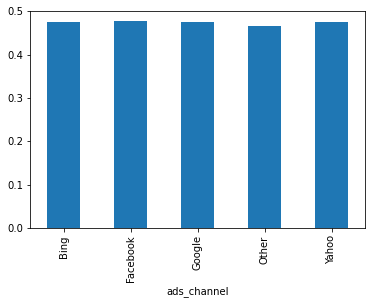

In [24]:
table.groupby('ads_channel')['test'].mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

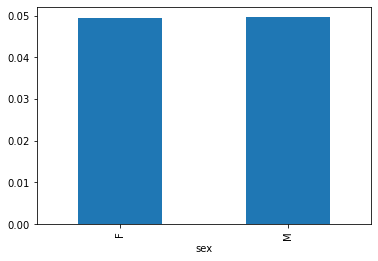

In [15]:
table.groupby('sex')['conversion'].mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

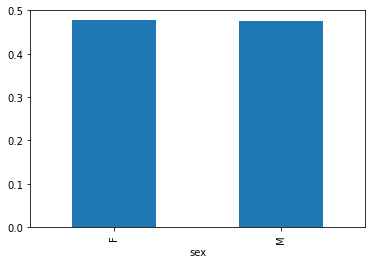

In [25]:
table.groupby('sex')['test'].mean().plot(kind='bar')

<AxesSubplot:xlabel='age'>

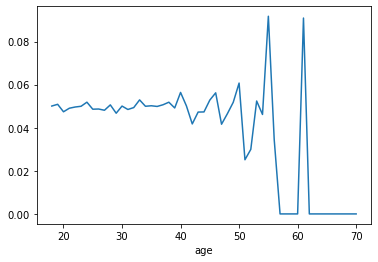

In [19]:
table.groupby('age')['conversion'].mean().plot.line()

<AxesSubplot:xlabel='age'>

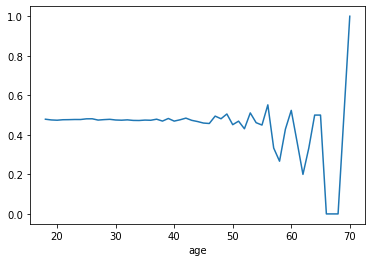

In [26]:
table.groupby('age')['test'].mean().plot.line()

<AxesSubplot:xlabel='age'>

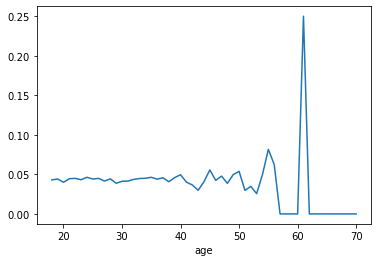

In [30]:
table[table['test']==1].groupby('age')['conversion'].mean().plot.line()

<AxesSubplot:xlabel='age'>

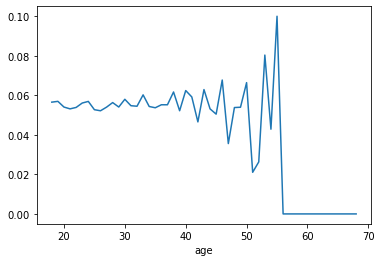

In [31]:
table[table['test']==0].groupby('age')['conversion'].mean().plot.line()

<AxesSubplot:xlabel='country'>

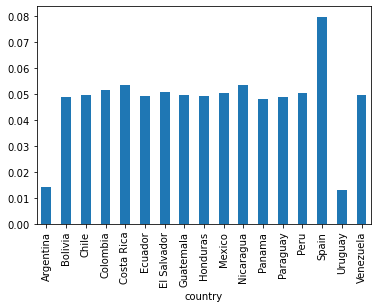

In [17]:
table.groupby('country')['conversion'].mean().plot(kind='bar')

<AxesSubplot:xlabel='country'>

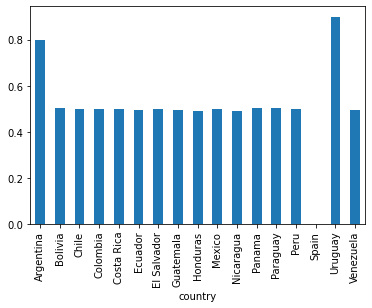

In [27]:
table.groupby('country')['test'].mean().plot(kind='bar')

In [38]:
table[table['country']=='Argentina'].groupby('test')['conversion'].mean()

test
0    0.015071
1    0.013725
Name: conversion, dtype: float64

In [39]:
table[table['country']=='Uruguay'].groupby('test')['conversion'].mean()

test
0    0.012048
1    0.012907
Name: conversion, dtype: float64

<AxesSubplot:xlabel='country'>

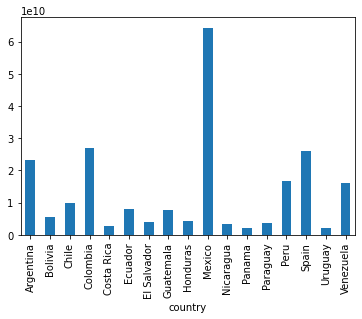

In [45]:
table.groupby('country')['user_id'].sum().plot(kind='bar')

users from Argentina and Uruguay are not evenly divided into 2 groups.<br>
nearly 80 cent of Argentina users were divided into test group.<br>
in addition, the number of users from Argentina is over 2 billion, which is almost 1/7 of all users.<br>
and Argentinan users in test group have a higher 0.0013 conversion over in control group, which have an unneglectable impact on final result.<br>

<AxesSubplot:xlabel='date'>

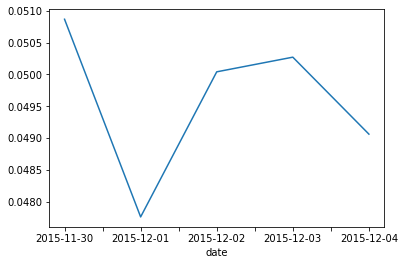

In [20]:
table.groupby('date')['conversion'].mean().plot.line()

<AxesSubplot:xlabel='date'>

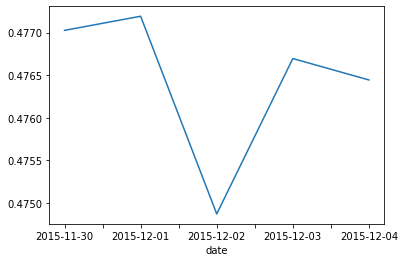

In [28]:
table.groupby('date')['test'].mean().plot.line()

<AxesSubplot:xlabel='date'>

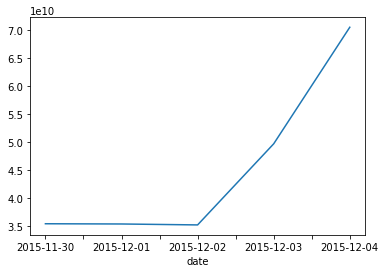

In [52]:
table.groupby('date')['user_id'].sum().plot.line()

<AxesSubplot:xlabel='date'>

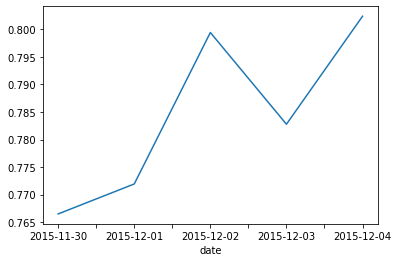

In [66]:
(table[table['test']==1].groupby('date')['conversion'].mean()/table[table['test']==0].groupby('date')['conversion'].mean()).plot.line()

In [71]:
t1 = table[table['test']==1].groupby('country')['conversion'].mean()
t0 = table[table['test']==0].groupby('country')['conversion'].mean()
pd.merge(left=t0,right=t1,left_index=True,right_index=True)

,conversion_x,conversion_y
country,,
Argentina,0.015071,0.013725
Bolivia,0.049369,0.047901
Chile,0.048107,0.051295
Colombia,0.052089,0.050571
Costa Rica,0.052256,0.054738
Ecuador,0.049154,0.048988
El Salvador,0.053554,0.047947
Guatemala,0.050643,0.048647
Honduras,0.050906,0.047540


### answer question 2: <br>
(1) Test has constantly been worse than control and there is relatively little variance across days. That
probably means that we do have enough data, but there was some bias in the experiment set up.<br>
(2) On a side note, we just ran it for 5 days. We should always run the test for at least 1 full week to
capture weekly patterns, 2 weeks would be much better.<br>
(3) the localized model is not necessarily worse than non-localized model.<br>